In [15]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer 
from keras.layers import Dense,Activation,Dropout
from sklearn.model_selection import train_test_split

In [16]:
warnings.filterwarnings("ignore")
# import data 
data = pd.read_csv('./breast_cancer_data1.csv',delimiter=',')
data.head()

,id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
data.drop(['id'], inplace=True, axis=1)
data.replace('?', -99999, inplace=True)

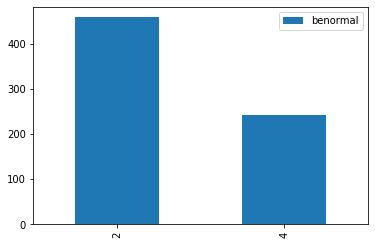

In [18]:
count = data.benormal.value_counts()
count.plot(kind='bar')
plt.legend()

In [19]:
data['benormal'] = data['benormal'].map(lambda x: 1 if x == 4 else 0)

In [20]:
# First 9 column is input parameters. 
X = data.iloc[:,0:9]
# Last Column is output data. So (0 is benign, 1 is malignant) 
y = data.iloc[:,-1]

In [21]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train)

(559, 9) (559,)
(140, 9) (140,)
[[0.44444444 0.         0.11111111 ... 0.11111111 0.         0.        ]
 [0.22222222 0.44444444 0.66666667 ... 0.66666667 1.         0.66666667]
 [0.22222222 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.55555556 0.         0.         ... 0.         0.         0.        ]
 [0.22222222 0.         0.         ... 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         ... 0.11111111 0.         0.        ]]


In [23]:
# Create Model with KERAS library
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,))) # FC Fully Connected Layer, input_dimension is dataset input parameters
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [25]:
history =  model.fit(X_train,y_train, 
                     epochs=25,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/25
70/70 [==============================] - 2s 9ms/step - loss: 0.6136 - accuracy: 0.8528 - val_loss: 0.2208 - val_accuracy: 0.9500
Epoch 2/25
70/70 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9624 - val_loss: 0.1175 - val_accuracy: 0.9714
Epoch 3/25
70/70 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9821 - val_loss: 0.1101 - val_accuracy: 0.9714
Epoch 4/25
70/70 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9644 - val_loss: 0.1112 - val_accuracy: 0.9714
Epoch 5/25
70/70 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9533 - val_loss: 0.1070 - val_accuracy: 0.9714
Epoch 6/25
70/70 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9703 - val_loss: 0.1092 - val_accuracy: 0.9714
Epoch 7/25
70/70 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9668 - val_loss: 0.1130 - val_accuracy: 0.9714
Epoch 8/25
70/70 [==

In [26]:
model.save_weights("example.h5")

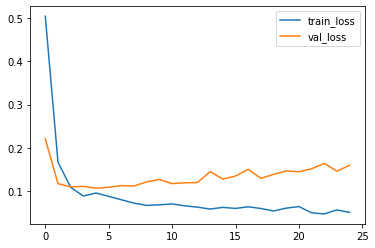

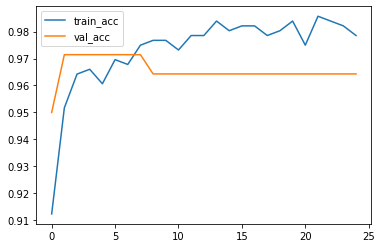

In [27]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.legend()
plt.show()

In [28]:
Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[87  3]
 [ 2 48]]


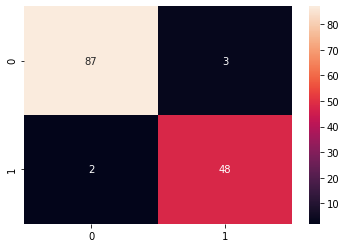

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_test, Y_pred))
print('Report : ')
print(classification_report(y_test, Y_pred))

Confusion Matrix :
[[87  3]
 [ 2 48]]
Accuracy Score : 0.9642857142857143
Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

